In [ ]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler

train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')


selected_cols_train = ['BedroomAbvGr','FullBath','HalfBath','GrLivArea','SalePrice']
selected_cols_test = ['BedroomAbvGr','FullBath','HalfBath','GrLivArea']

train_cols = train_dataset[selected_cols_train]
test_cols = test_dataset[selected_cols_test]

X_train = train_cols.iloc[:,:-1].values
y_train = train_cols.iloc[:,-1].values.reshape(-1,1)
X_test = test_cols.iloc[:].values

# Create scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Fit scaler only on training data, then transform both train and test
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)

X_train_tensor = torch.tensor(X_train_scaled,dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled,dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled,dtype=torch.float32)

In [ ]:
# Creating model
model_0 = nn.Linear(in_features=4,out_features=1)

In [ ]:
#creating lossfunction
loss_fn = nn.L1Loss()

#creatg optimiser
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001)

In [ ]:
epochs = 1000

# Creating training loop
for epoch in range(epochs):
    model_0.train()

    #Forward pass
    y_pred = model_0(X_train_tensor)

    #Calculate loss
    loss = loss_fn(y_pred,y_train_tensor)

    # optimizer zero grad
    optimizer.zero_grad()

    # back loss
    loss.backward()

    # optimizer step
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

Epoch [0/1000], Loss: 0.4479
Epoch [100/1000], Loss: 0.4473
Epoch [200/1000], Loss: 0.4467
Epoch [300/1000], Loss: 0.4462
Epoch [400/1000], Loss: 0.4456
Epoch [500/1000], Loss: 0.4451
Epoch [600/1000], Loss: 0.4447
Epoch [700/1000], Loss: 0.4443
Epoch [800/1000], Loss: 0.4439
Epoch [900/1000], Loss: 0.4436


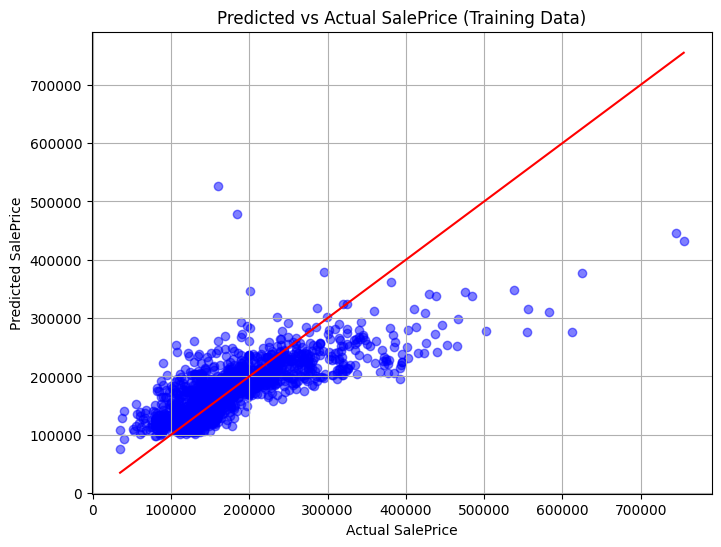

In [ ]:
# Switch model to evaluation mode
model_0.eval()

# Predict on training data for visualization
with torch.no_grad():
    y_train_pred_scaled = model_0(X_train_tensor).numpy()
    y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
    y_train_actual = scaler_y.inverse_transform(y_train_tensor.numpy())

# Scatter plot of predicted vs actual SalePrice
plt.figure(figsize=(8, 6))
plt.scatter(y_train_actual, y_train_pred, color='blue', alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice (Training Data)")
plt.plot([y_train_actual.min(), y_train_actual.max()],
         [y_train_actual.min(), y_train_actual.max()], color='red')  # Perfect prediction line
plt.grid()
plt.show()

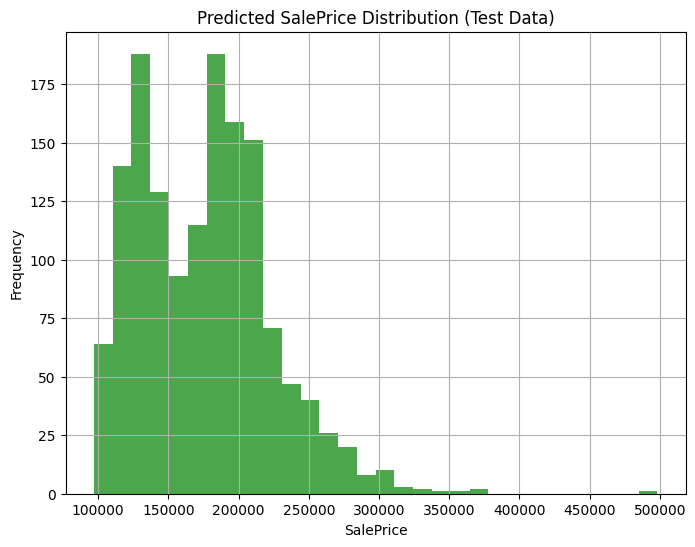

In [ ]:
# Predict on test data
with torch.no_grad():
    y_test_pred_scaled = model_0(X_test_tensor).numpy()
    y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Histogram of test predictions
plt.figure(figsize=(8, 6))
plt.hist(y_test_pred.flatten(), bins=30, color='green', alpha=0.7)
plt.title("Predicted SalePrice Distribution (Test Data)")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.grid()
plt.show()

In [ ]:
# Create DataFrame with Id and Predicted SalePrice
output_df = pd.DataFrame({
    "Id": test_dataset["Id"],  # Replace "Id" with actual ID column name if different
    "SalePrice": y_test_pred.flatten()
})

# Save to CSV
output_df.to_csv("predicted_house_prices_with_id.csv", index=False)
print("Predictions with ID saved to predicted_house_prices_with_id.csv")

Predictions with ID saved to predicted_house_prices_with_id.csv


In [ ]:

# Save the trained model to a file
torch.save(model_0.state_dict(), "linear_regression_model.pth")
print("Model saved to linear_regression_model.pth")

# Recreate the same model architecture
model_loaded = nn.Linear(in_features=4, out_features=1)
model_loaded.load_state_dict(torch.load("linear_regression_model.pth"))
model_loaded.eval()


Model saved to linear_regression_model.pth


Linear(in_features=4, out_features=1, bias=True)